# Fraud check python csv Random forest and descision tree

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [64]:
data = pd.read_csv('Fraud_check.csv')

In [65]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [66]:
data.columns.value_counts() # there is no distincet value other than this catagory

Marital.Status     1
Taxable.Income     1
Urban              1
Undergrad          1
Work.Experience    1
City.Population    1
dtype: int64

In [67]:
data['Taxable.Income'] # lets convert taxable income into riskey and good catagory

0      68833
1      33700
2      36925
3      50190
4      81002
       ...  
595    76340
596    69967
597    47334
598    98592
599    96519
Name: Taxable.Income, Length: 600, dtype: int64

In [68]:
data['Taxable.Income'] = np.where(data['Taxable.Income']<= 30000,'riskey','good')

In [69]:
data.head() # we converted our taxable catagory riskey and good

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,good,50047,10,YES
1,YES,Divorced,good,134075,18,YES
2,NO,Married,good,160205,30,YES
3,YES,Single,good,193264,15,YES
4,NO,Married,good,27533,28,NO


In [60]:
from sklearn.preprocessing import LabelEncoder 
lb=LabelEncoder()

In [70]:
data.Undergrad=lb.fit_transform(data.Undergrad)
data.Urban=lb.fit_transform(data.Urban)
data['Marital.Status']=lb.fit_transform(data["Marital.Status"])
data.columns
colnam=list(data.columns)
predictor=colnam[:5]
target=colnam[5]

In [75]:
target

'Urban'

In [71]:
data.head() # i have encoded the levels of my data and now it is easy to manipulate

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,good,50047,10,1
1,1,0,good,134075,18,1
2,0,1,good,160205,30,1
3,1,2,good,193264,15,1
4,0,1,good,27533,28,0


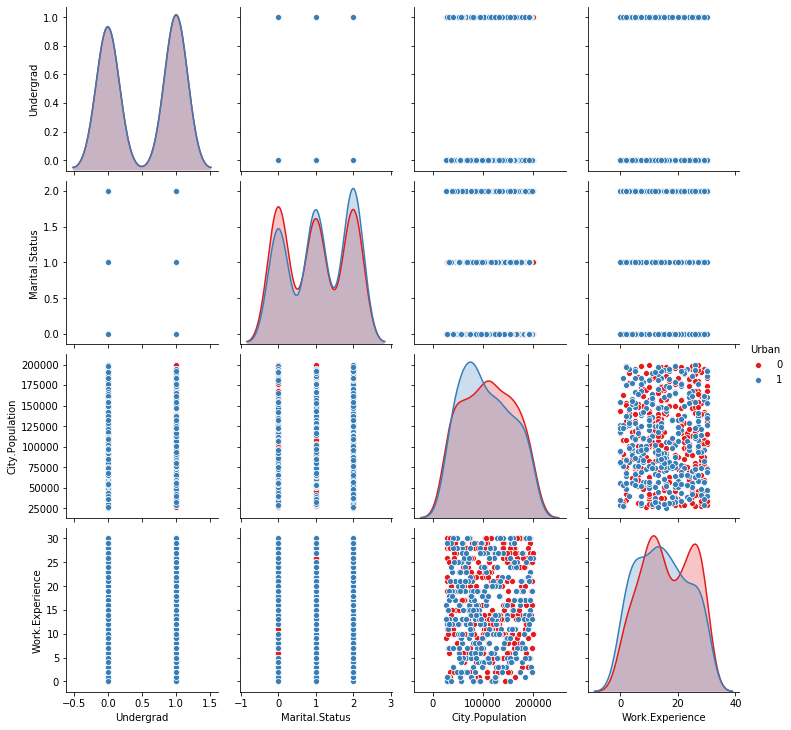

In [72]:
sns.pairplot(data,hue='Urban',palette='Set1') 

In [73]:
data.keys()

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [38]:
from sklearn.model_selection import train_test_split

In [79]:
X = data[['Undergrad', 'Marital.Status', 'City.Population',
       'Work.Experience']] 
y = [['Urban']]

# Decision Trees

In [80]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=1)
dtree = DecisionTreeClassifier()

In [81]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# Prediction and Evaluation

In [82]:
predictions = dtree.predict(X_test)

In [83]:
from sklearn.metrics import classification_report,confusion_matrix

In [84]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.52      0.55      0.53        84
           1       0.59      0.56      0.57        96

    accuracy                           0.56       180
   macro avg       0.55      0.56      0.55       180
weighted avg       0.56      0.56      0.56       180



In [85]:
print(confusion_matrix(y_test,predictions))

[[46 38]
 [42 54]]


# Random Forests

In [89]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [93]:
rfc_pred = rfc.predict(X_test)

In [91]:
print(confusion_matrix(y_test,rfc_pred))

[[49 35]
 [46 50]]


In [94]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.52      0.58      0.55        84
           1       0.59      0.52      0.55        96

    accuracy                           0.55       180
   macro avg       0.55      0.55      0.55       180
weighted avg       0.55      0.55      0.55       180

